In [11]:
import pandas as pd

# Update the path if needed
df = pd.read_csv("CSV.csv")
df.head()


,CID,MolecularWeight,XLogP,InChIKey,CanonicalSMILES
0,2244,180.16,1.2,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,CC(=O)OC1=CC=CC=C1C(=O)O
1,1983,151.16,0.5,RZVAJINKPMORJF-UHFFFAOYSA-N,CC(=O)NC1=CC=C(C=C1)O
2,2519,194.19,-0.1,RYYVLZVUVIJVGH-UHFFFAOYSA-N,CN1C=NC2=C1C(=O)N(C(=O)N2C)C
3,3672,206.28,3.5,HEFNNWSXXWATRW-UHFFFAOYSA-N,CC(C)CC1=CC=C(C=C1)C(C)C(=O)O
4,3676,234.34,2.3,NNJVILVZKWQKPM-UHFFFAOYSA-N,CCN(CC)CC(=O)NC1=C(C=CC=C1C)C


In [13]:
# Check column names and data types
print(df.info())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CID              5 non-null      int64  
 1   MolecularWeight  5 non-null      float64
 2   XLogP            5 non-null      float64
 3   InChIKey         5 non-null      object 
 4   CanonicalSMILES  5 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 328.0+ bytes
None
CID                0
MolecularWeight    0
XLogP              0
InChIKey           0
CanonicalSMILES    0
dtype: int64


In [17]:
# Rename columns for easier access if needed
df.rename(columns={'CanonicalSMILES': 'SMILES'}, inplace=True)

# Drop rows with missing values if necessary
df.dropna(inplace=True)

# Check the cleaned dataset
df.head()


,CID,MolecularWeight,XLogP,InChIKey,SMILES
0,2244,180.16,1.2,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,CC(=O)OC1=CC=CC=C1C(=O)O
1,1983,151.16,0.5,RZVAJINKPMORJF-UHFFFAOYSA-N,CC(=O)NC1=CC=C(C=C1)O
2,2519,194.19,-0.1,RYYVLZVUVIJVGH-UHFFFAOYSA-N,CN1C=NC2=C1C(=O)N(C(=O)N2C)C
3,3672,206.28,3.5,HEFNNWSXXWATRW-UHFFFAOYSA-N,CC(C)CC1=CC=C(C=C1)C(C)C(=O)O
4,3676,234.34,2.3,NNJVILVZKWQKPM-UHFFFAOYSA-N,CCN(CC)CC(=O)NC1=C(C=CC=C1C)C


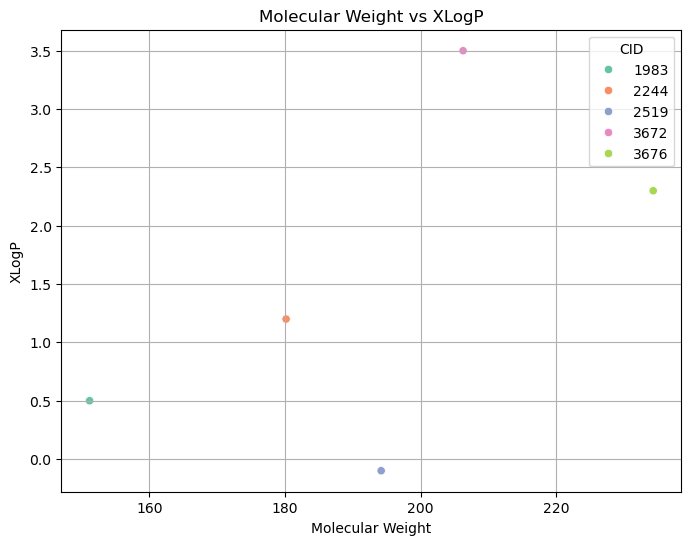

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='MolecularWeight', y='XLogP', hue='CID', palette='Set2')
plt.title('Molecular Weight vs XLogP')
plt.xlabel('Molecular Weight')
plt.ylabel('XLogP')
plt.grid(True)
plt.show()


C:\Users\SHIVANI\AppData\Local\Temp\ipykernel_13568\80929209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='CID', y='XLogP', palette='Set3')


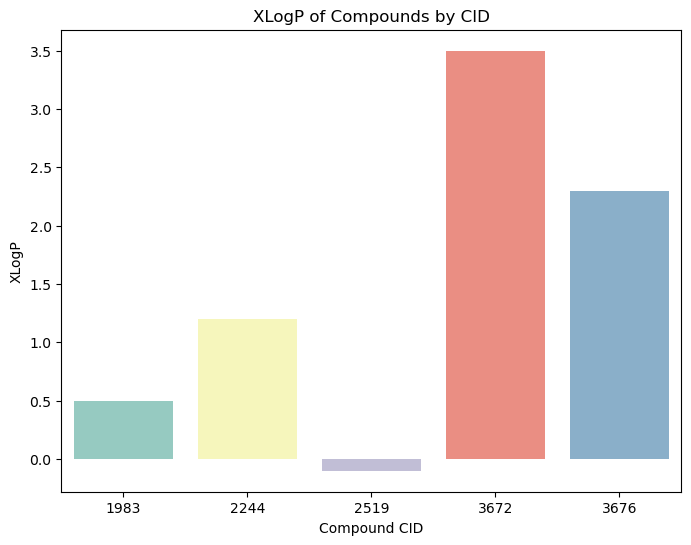

In [7]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='CID', y='XLogP', palette='Set3')
plt.title('XLogP of Compounds by CID')
plt.xlabel('Compound CID')
plt.ylabel('XLogP')
plt.show()


In [22]:
def predict_solvent(xlogp):
    if pd.isna(xlogp):
        return "Unknown"
    elif xlogp < 0:
        return "Water-based"
    elif 0 <= xlogp <= 3:
        return "Alcohol/Mixed"
    else:
        return "Oil-based"

# Apply the function to the dataframe
df['Predicted_Solvent'] = df['XLogP'].apply(predict_solvent)

# Grouping by predicted solvent
grouped = df.groupby('Predicted_Solvent')

# Display the groups
for solvent, group in grouped:
    print(f"\n Solvent Type: {solvent}")
    print(group[['CID', 'MolecularWeight', 'XLogP']])


 Solvent Type: Alcohol/Mixed
    CID  MolecularWeight  XLogP
0  2244           180.16    1.2
1  1983           151.16    0.5
4  3676           234.34    2.3

 Solvent Type: Oil-based
    CID  MolecularWeight  XLogP
3  3672           206.28    3.5

 Solvent Type: Water-based
    CID  MolecularWeight  XLogP
2  2519           194.19   -0.1
